In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dense,Dropout

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [6]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

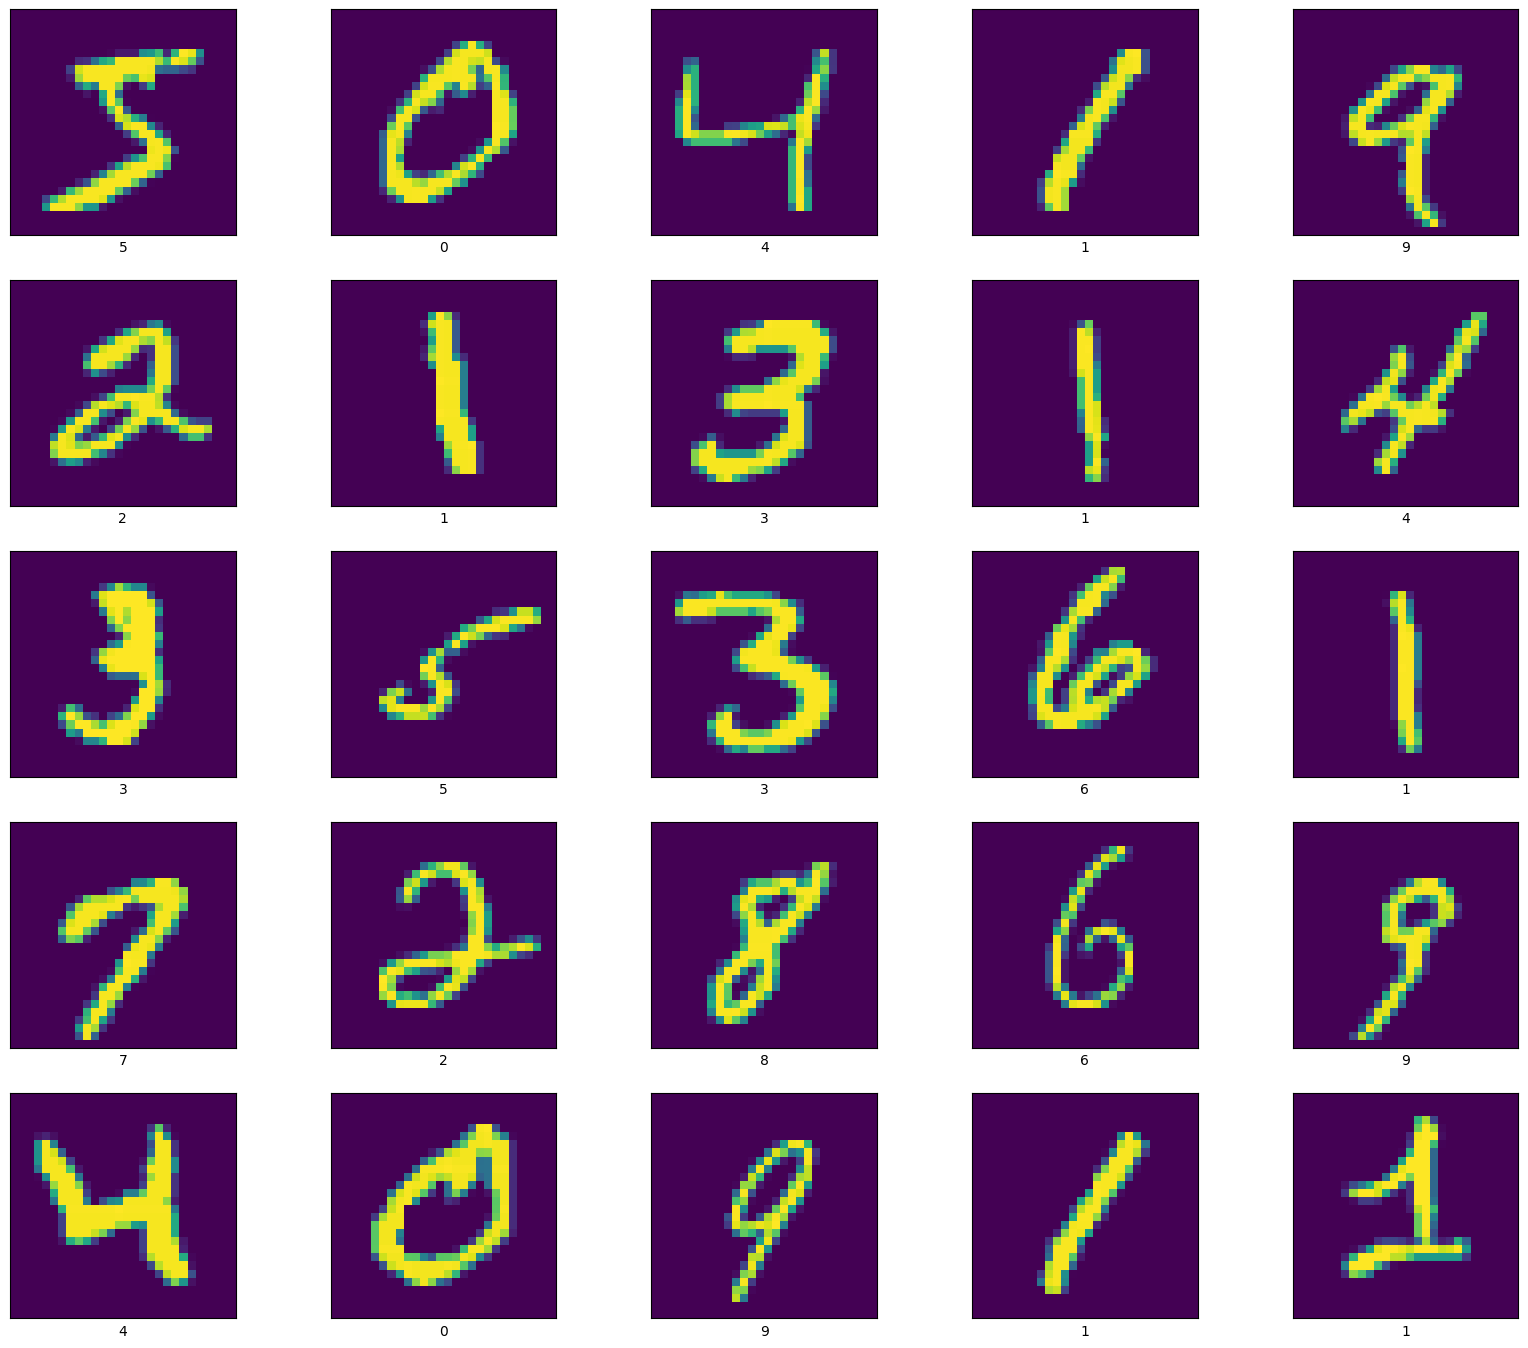

In [9]:
plt.figure(figsize=(20,17))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  plt.imshow(x_train[i])
  plt.xlabel(y_train[i])
plt.show()

In [10]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [12]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


In [15]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [49]:
model = Sequential()
model.add(Flatten())
model.add(Dense(256,activation='relu',input_shape=(28,28,1)))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [50]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [51]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=64,epochs=10)

Epoch 1/10
938/938 [==============================] - 6s 4ms/step - loss: 3.7733 - accuracy: 0.1884 - val_loss: 1.9652 - val_accuracy: 0.2459
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 1.9829 - accuracy: 0.2474 - val_loss: 1.8544 - val_accuracy: 0.2709
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 1.8528 - accuracy: 0.2996 - val_loss: 1.4920 - val_accuracy: 0.4380
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: 1.6635 - accuracy: 0.3670 - val_loss: 1.2718 - val_accuracy: 0.5353
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 1.5732 - accuracy: 0.3880 - val_loss: 1.2435 - val_accuracy: 0.5381
Epoch 6/10
938/938 [==============================] - 3s 4ms/step - loss: 1.4825 - accuracy: 0.4198 - val_loss: 1.0982 - val_accuracy: 0.5685
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 1.3679 - accuracy: 0.4751 - val_loss: 0.9697 - val_accuracy: 0.6885
Epoch 

In [54]:
# mini-batch-gradient-descent
batch_size=64
num_classes = 10
epochs=10
input_shape=(28,28,1)

def build_model(optimizer):
  model = Sequential()
  model.add(Flatten()) # image processing 
  model.add(Dense(256, activation='relu', input_shape=input_shape))
  model.add(Dropout(0.25))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])
  return model

In [55]:
# Train the model
optimizers = ['SGD', 'Adagrad', 'Adadelta','RMSprop','Adam']

for i in optimizers:
  model = build_model(i)
  print(i)
  history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size,
                      epochs=epochs, verbose=1)

SGD
Epoch 1/10
938/938 [==============================] - 5s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 8/10
938/938 [========================

In [ ]:
# SGD      accuracy: 0.0987  val_accuracy: 0.0980
# Adagrad  accuracy: 0.7949  val_accuracy: 0.9061
# AdaDelta accuracy: 0.3813  val_accuracy: 0.6904
# RMSprop  accuracy: 0.9237  val_accuracy: 0.9558
# Adam     laccuracy: 0.9347 val_accuracy: 0.9593

In [ ]:
# From the above optimizers Adam has the best accuracy